In [ ]:
!unzip /content/riceleaf.zip

In [2]:

# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import time
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2
import shutil
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
# Generating training and testing datasets
epochs = 100
batch_size = 6
img_width, img_height = 64, 64
from tensorflow.keras import backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

training_set = train_datagen.flow_frotrain_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 104 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [5]:
from tensorflow.keras.layers import Conv2D

In [6]:
# Part 2 - Building the CNN

# Initialising the CNN
from keras.layers import BatchNormalization
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros'))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# adding third convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# adding forth convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a fifth convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(128, activation ="relu"))

cnn.add( tf.keras.layers.Dropout(rate=0.5))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(3, activation ="softmax"))





In [7]:
cnn.summary()   #summary of the CNN model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [13]:
# Part 3 - Training the CNN
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Compiling the CNN
cnn.compile(optimizer =opt, loss = 'mse', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set,epochs = 200)

Epoch 1/200
18/18 [==============================] - 6s 292ms/step - loss: 0.1399 - accuracy: 0.7212 - val_loss: 0.2691 - val_accuracy: 0.3333
Epoch 2/200
18/18 [==============================] - 5s 271ms/step - loss: 0.1676 - accuracy: 0.6346 - val_loss: 0.2657 - val_accuracy: 0.3333
Epoch 3/200
18/18 [==============================] - 5s 272ms/step - loss: 0.1274 - accuracy: 0.7692 - val_loss: 0.2440 - val_accuracy: 0.4000
Epoch 4/200
18/18 [==============================] - 5s 272ms/step - loss: 0.1291 - accuracy: 0.7115 - val_loss: 0.2226 - val_accuracy: 0.5333
Epoch 5/200
18/18 [==============================] - 5s 272ms/step - loss: 0.1279 - accuracy: 0.7212 - val_loss: 0.2067 - val_accuracy: 0.4667
Epoch 6/200
18/18 [==============================] - 5s 280ms/step - loss: 0.1554 - accuracy: 0.6827 - val_loss: 0.2063 - val_accuracy: 0.5000
Epoch 7/200
18/18 [==============================] - 5s 273ms/step - loss: 0.1187 - accuracy: 0.7500 - val_loss: 0.2030 - val_accuracy: 0.5667

In [54]:
# Making a prediction(1)

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Bacterial-leaf-blight.-Burrows.-July-2010.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [55]:
result

array([[7.5664220e-04, 1.2061298e-01, 8.7863034e-01]], dtype=float32)

In [25]:
float(result[:,2])

0.8786303400993347

In [ ]:
model.summary()

In [40]:
# Making a prediction(2)

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Cochliobolus_miyabeanus.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result1 = cnn.predict(test_image)

In [27]:
result1

array([[1.3090374e-09, 1.0000000e+00, 3.0355057e-08]], dtype=float32)

In [44]:
float(result1[:,1])

0.9995065927505493

In [36]:
# Making a prediction(3)
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/unnamed.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result2 = cnn.predict(test_image)

In [39]:
float(result2[:,1])

0.8577139377593994

'Bacterial leaf blight'

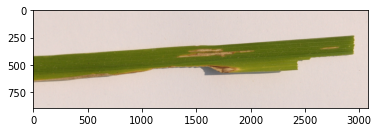

In [51]:
#checking output 
import numpy as np
from tensorflow.keras.preprocessing import image
path = '/content/train/Bacterial leaf blight/DSC_0365.JPG'
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=input_shape)
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
result = cnn.predict(test_img)

a = result.argmax()
s = training_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

'Leaf smut'

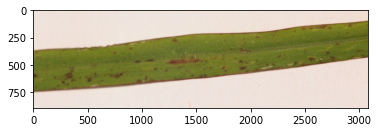

In [52]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = '/content/train/Leaf smut/DSC_0309.JPG'
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=input_shape)
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
result = cnn.predict(test_img)

a = result.argmax()
s = training_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

'Brown spot'

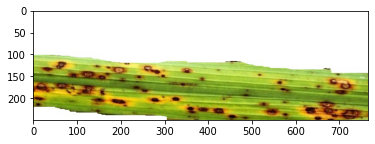

In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = '/content/train/Brown spot/DSC_0100.jpg'
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=input_shape)
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
result = cnn.predict(test_img)

a = result.argmax()
s = training_set.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

In [100]:

# classification_report and confusion matrix
batch_size = 6
target_names = ['bact', 'bro','smut']
Y_pred = cnn.predict_generator(test_set, 2513 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_set.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_set.classes, y_pred))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[4 4 2]
 [3 2 5]
 [3 3 4]]
Classification Report
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.22      0.20      0.21        10
           2       0.36      0.40      0.38        10

    accuracy                           0.33        30
   macro avg       0.33      0.33      0.33        30
weighted avg       0.33      0.33      0.33        30

